   HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0     1     0          123  3869200167        2374        26
1     1     0          124  3869200167        2374        27
2     1     0           63  3869200167        2553        28
3     1     0           64  3869200167        2558        19
4     1     0           64  3869200167        2760        25
Estimated number of BX in an ORBIT (x): 1180
   HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0     1     0          123  3869200167        2374        26   
1     1     0          124  3869200167        2374        27   
2     1     0           63  3869200167        2553        28   
3     1     0           64  3869200167        2558        19   
4     1     0           64  3869200167        2760        25   

   absolute_time_ns                 absolute_time  
0            0.0000 1970-01-01 00:00:00.000000000  
1            0.8125 1970-01-01 00:00:00.000000000  
2         4476.6250 1970-01-01 00:00:00.00000447

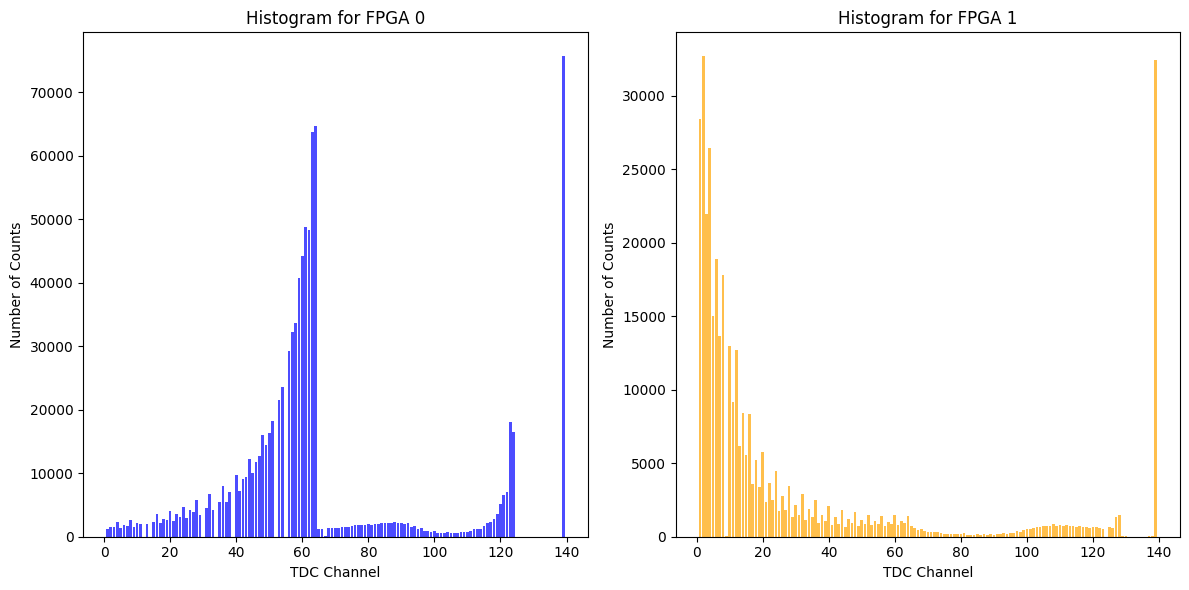

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. PANDAS DATAFRAME
file_path = "data/data_000637.txt"

try:
    df_sample = pd.read_csv(file_path)
    print(df_sample.head())

except pd.errors.EmptyDataError:
    print("The file appears to be empty. Please check the file contents.")
except pd.errors.ParserError as e:
    print(f"An error occurred while parsing the file: {e}")

# 2.
try:
    df_sample = pd.read_csv(file_path, nrows=10000)
    max_bx_indices = df_sample[df_sample['BX_COUNTER'] == df_sample['BX_COUNTER'].max()].index
    if len(max_bx_indices) >= 2:
        x_estimate = max_bx_indices[1] - max_bx_indices[0]
        print("Estimated number of BX in an ORBIT (x):", x_estimate)
    else:
        print("Unable to estimate x. Check the dataset for proper BX_COUNTER values.")
except pd.errors.EmptyDataError:
    print("The file appears to be empty. Please check the file contents.")
except pd.errors.ParserError as e:
    print(f"An error occurred while parsing the file: {e}")

# 3.
try:
    df = pd.read_csv(file_path)
    df['absolute_time_ns'] = (
            (df['ORBIT_CNT'] * df['BX_COUNTER'].max() + df['BX_COUNTER']) * 25 + df['TDC_MEAS'] * (25 / 30)
    )
    start_time = df['absolute_time_ns'].min()
    df['absolute_time_ns'] -= start_time

    df['absolute_time'] = pd.to_datetime(df['absolute_time_ns'], unit='ns')

    print(df.head())

except pd.errors.EmptyDataError:
    print("The file appears to be empty. Please check the file contents.")
except pd.errors.ParserError as e:
    print(f"An error occurred while parsing the file: {e}")

# 4.
try:
    df = pd.read_csv(file_path)
    df['absolute_time_ns'] = (
            (df['ORBIT_CNT'] * df['BX_COUNTER'].max() + df['BX_COUNTER']) * 25 + df['TDC_MEAS'] * (25 / 30)
    )
    start_time = df['absolute_time_ns'].min()
    df['absolute_time_ns'] -= start_time

    df['absolute_time'] = pd.to_datetime(df['absolute_time_ns'], unit='ns')

    start_datetime = df['absolute_time'].min()
    end_datetime = df['absolute_time'].max()

    duration = end_datetime - start_datetime

    hours, remainder = divmod(duration.seconds, 3600)
    minutes, seconds = divmod(remainder, 60)

    print(f"Duration of data taking: {duration.days} days, {hours} hours, {minutes} minutes, {seconds} seconds")

except pd.errors.EmptyDataError:
    print("The file appears to be empty. Please check the file contents.")
except pd.errors.ParserError as e:
    print(f"An error occurred while parsing the file: {e}")

# 5.

try:
    df = pd.read_csv(file_path)
    channel_counts = df.groupby('TDC_CHANNEL').size()
    sorted_channels = channel_counts.sort_values(ascending=False)
    top_noisy_channels = sorted_channels.head(3)
    print("Top 3 Noisy Channels:")
    print(top_noisy_channels)

except pd.errors.EmptyDataError:
    print("The file appears to be empty. Please check the file contents.")
except pd.errors.ParserError as e:
    print(f"An error occurred while parsing the file: {e}")

# 6.
try:
    df = pd.read_csv(file_path)
    non_empty_orbits_count = df['ORBIT_CNT'].nunique()

    print(f"Number of non-empty orbits: {non_empty_orbits_count}")
except pd.errors.EmptyDataError:
    print("The file appears to be empty. Please check the file contents.")
except pd.errors.ParserError as e:
    print(f"An error occurred while parsing the file: {e}")

# 7.
try:
    df = pd.read_csv(file_path)

    filtered_df = df[df['TDC_CHANNEL'] == 139]

    unique_orbits_count = filtered_df['ORBIT_CNT'].nunique()

    print(f"Number of unique orbits with at least one measurement from TDC_CHANNEL=139: {unique_orbits_count}")

except pd.errors.EmptyDataError:
    print("The file appears to be empty. Please check the file contents.")
except pd.errors.ParserError as e:
    print("An error occurred while parsing the file: {e}")

# 8.
try:
    df = pd.read_csv(file_path)

    channel_counts_by_fpga = df.groupby(['FPGA', 'TDC_CHANNEL']).size()

    fpga_0_counts = channel_counts_by_fpga[0] if 0 in channel_counts_by_fpga.index.levels[0] else pd.Series()
    fpga_1_counts = channel_counts_by_fpga[1] if 1 in channel_counts_by_fpga.index.levels[0] else pd.Series()

    print("FPGA 0 Counts:")
    print(fpga_0_counts)

    print("\nFPGA 1 Counts:")
    print(fpga_1_counts)

except pd.errors.EmptyDataError:
    print("The file appears to be empty. Please check the file contents.")
except pd.errors.ParserError as e:
    print(f"An error occurred while parsing the file: {e}")

# 9.
try:
    df = pd.read_csv(file_path)

    channel_counts_by_fpga = df.groupby(['FPGA', 'TDC_CHANNEL']).size()

    fpga_0_counts = channel_counts_by_fpga[0] if 0 in channel_counts_by_fpga.index.levels[0] else pd.Series()
    fpga_1_counts = channel_counts_by_fpga[1] if 1 in channel_counts_by_fpga.index.levels[0] else pd.Series()

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.bar(fpga_0_counts.index, fpga_0_counts.values, color='blue', alpha=0.7)
    plt.title('Histogram for FPGA 0')
    plt.xlabel('TDC Channel')
    plt.ylabel('Number of Counts')

    plt.subplot(1, 2, 2)
    plt.bar(fpga_1_counts.index, fpga_1_counts.values, color='orange', alpha=0.7)
    plt.title('Histogram for FPGA 1')
    plt.xlabel('TDC Channel')
    plt.ylabel('Number of Counts')

    plt.tight_layout()
    plt.show()

except pd.errors.EmptyDataError:
    print("The file appears to be empty. Please check the file contents.")
except pd.errors.ParserError as e:
    print(f"An error occurred while parsing the file: {e}")
